In [13]:
import pandas as pd
import numpy as np
import pickle
import glob
import json
import os

from sklearn.utils import shuffle
from keras.preprocessing import sequence, image
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import array_to_img, img_to_array
from keras.models import model_from_json
from keras import backend as K
from collections import Counter
from utils.data_loading.load_data import get_tile_data
from PIL import Image, ImageOps

from sklearn.feature_extraction.text import TfidfVectorizer

import pickle5 as pickle

# load the multilabel binarizer
with open("../model/model_tokenizer.pickle", "rb") as handle:
    mlb = pickle.load(handle)
print("Feature Dictionary Loaded")
total_features = len(mlb.classes_)
print("The feature dictionary has size", total_features)
print("Features", mlb.classes_)

# load entire autoencoder architecture
json_file = open("../model/autoencoder_model_test.json", "r")
loaded_model_json = json_file.read()
json_file.close()
ae_sep_output = model_from_json(loaded_model_json)
ae_sep_output.load_weights("../model/autoencoder_model_test.h5")
print("Loaded Entire Autoencoder Model from the Disk")

# load the encoding architecture and weights
json_file = open("../model/encoder_model_test.json", "r")
loaded_model_json = json_file.read()
json_file.close()
encoding_model = model_from_json(loaded_model_json)
encoding_model.load_weights("../model/encoder_model_test.h5")
print("Loaded Encoder Model from the Disk")

# load the decoding architecture and weights
json_file = open("../model/decoder_model_test.json", "r")
loaded_model_json = json_file.read()
json_file.close()
decoding_model = model_from_json(loaded_model_json)
# load weights into new model
decoding_model.load_weights("../model/decoder_model_test.h5")
print("Loaded Decoder Model from the Disk")

Feature Dictionary Loaded
The feature dictionary has size 13
Features ['block' 'breakable' 'climbable' 'collectable' 'element' 'empty' 'hazard'
 'moving' 'openable' 'passable' 'pipe' 'solid' 'wall']
Loaded Entire Autoencoder Model from the Disk
Loaded Encoder Model from the Disk
Loaded Decoder Model from the Disk


In [14]:
def build_game_dataframe(current_game, game_image_dir, image_extension):
    image_ids = set(
        [
            path.split("/")[-1].split(".")[0]
            for path in glob.glob(game_image_dir + "/*" + image_extension)
        ]
    )
    ids = image_ids
    # build a dataframe
    image_paths = [game_image_dir + image_id + ".png" for image_id in ids]
    game_data = pd.DataFrame(columns=["image_path"])
    game_data["image_path"] = image_paths
    assert game_data.shape[0] == len(ids)
    print("\nAll Levels Loaded")
    print("\nTotal Levels for game ", current_game, " detected are ", len(ids))
    return game_data, list(ids)

In [5]:
current_game = "bubble_bobble"
game_image_dir = "../data/bubble_bobble/"
save_dir = "../data/unified_rep/bubble_bobble/"

loaded_game_data, identifiers = build_game_dataframe(
        current_game,
        game_image_dir,
        ".png")


All Levels Loaded

Total Levels for game  bubble_bobble  detected are  95


In [17]:
def get_pickle_file(path):
    with open(path,"rb") as handle:
        return pickle.load(handle)

In [18]:
train_image_batch=get_pickle_file("../data/train_image_batch.pickle")
train_text_batch=get_pickle_file("../data/train_text_batch.pickle")
output_image_batch=get_pickle_file("../data/output_image_batch.pickle")
output_text_batch=get_pickle_file("../data/output_text_batch.pickle")

#testing
test_image_batch=get_pickle_file("../data/test_image_batch.pickle")
test_text_batch=get_pickle_file("../data/test_text_batch.pickle")

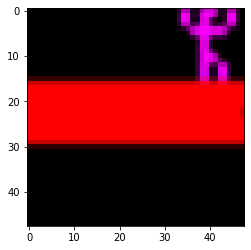

In [22]:
import matplotlib.pyplot as plt

plt.imshow(np.array(train_image_batch[0]).astype(np.uint8))

In [44]:
numOfImages = 10
images = ae_sep_output([train_image_batch[:numOfImages], train_text_batch[:numOfImages]])[0]

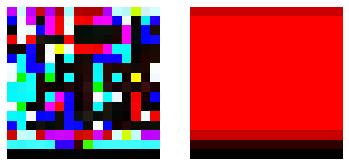

<Figure size 432x288 with 0 Axes>

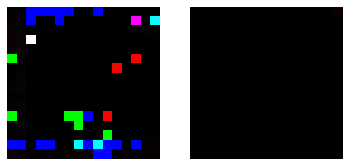

<Figure size 432x288 with 0 Axes>

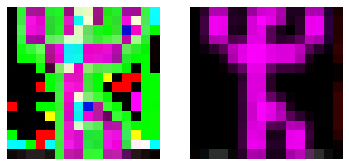

<Figure size 432x288 with 0 Axes>

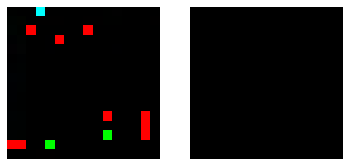

<Figure size 432x288 with 0 Axes>

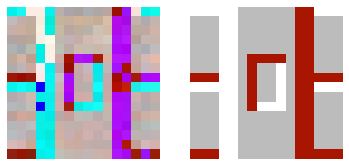

<Figure size 432x288 with 0 Axes>

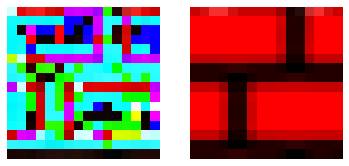

<Figure size 432x288 with 0 Axes>

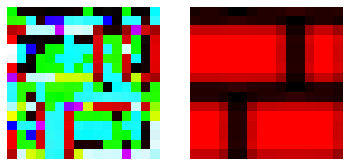

<Figure size 432x288 with 0 Axes>

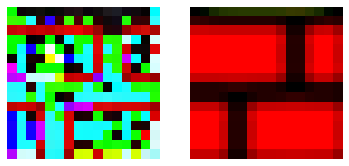

<Figure size 432x288 with 0 Axes>

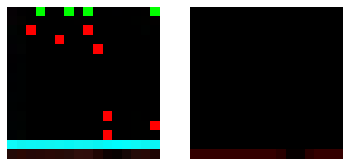

<Figure size 432x288 with 0 Axes>

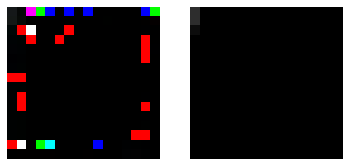

<Figure size 432x288 with 0 Axes>

In [45]:
for i, image in enumerate(images):

    fig, axes = plt.subplots(1, 2)
    
    axes[0].imshow(image.numpy().reshape(16, 16, 3).astype(np.uint8))
    axes[0].axis(False)

    axes[1].imshow(output_image_batch[i].astype(np.uint8))
    axes[1].axis(False)
    
    plt.figure()